In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.path.abspath('../../..'))

# load the modules
from fridom.ShallowWater.ModelSettings import ModelSettings
from fridom.ShallowWater.Grid import Grid
from fridom.ShallowWater.InitialConditions import Random, SingleWave, Jet
from fridom.ShallowWater.Model import Model
from fridom.ShallowWater.Plot import Plot
from fridom.ShallowWater.Diagnostics.LESFilter import LESFilter
from fridom.ShallowWater.State import State

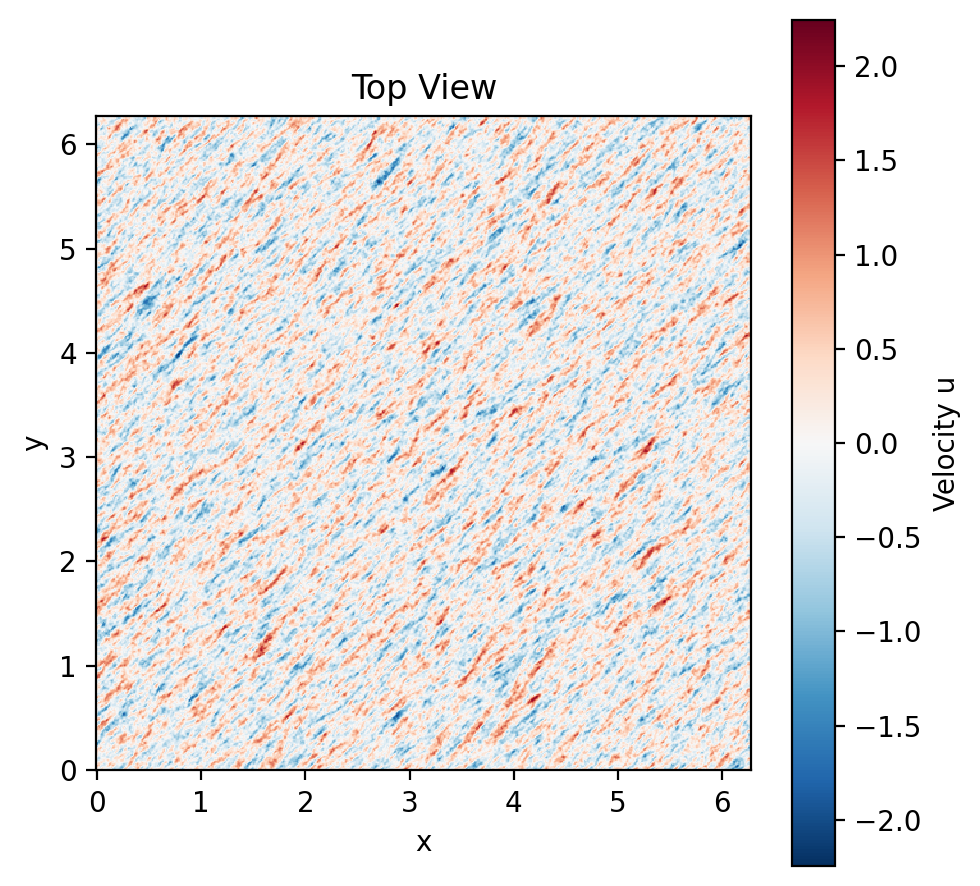

In [9]:
plot = lambda z: Plot(z.h)(z)
fac = 9
reso = 2**fac
dt = 2**(-fac)
mset = ModelSettings(N=[reso, reso], dt=dt, Ro=0.3)
grid = Grid(mset)
z_test = Random(mset, grid, seed=0)

les = LESFilter(mset, grid, kmax=20)

dudx_spe = les.differentiate(z_test.u, axis=0)
dudx_fd = z_test.u.diff_backward(axis=0)

dvdy_spe = les.differentiate(z_test.v, axis=1)
dvdy_fd = z_test.v.diff_backward(axis=1)


dh_spe = - mset.csqr * (dudx_spe + dvdy_spe)
dh_fd = - mset.csqr * (dudx_fd + dvdy_fd)


Plot(dh_spe)()